#  **Introduction**
Financial loan services are crucial to supporting both individuals and businesses, ranging from personal banking needs to institutional financing. However, one of the biggest challenges in this sector is loan default, where borrowers fail to repay their loans on time. Loan defaults not only reduce profitability for financial institutions but also increase the risk exposure in credit portfolios.

To mitigate this, many institutions are increasingly using machine learning to proactively predict the likelihood of default. These predictive models help identify high-risk borrowers early in the lending process, enabling lenders to make informed decisions and implement targeted intervention strategies. This project aims to build and evaluate several machine learning models that can effectively predict the likelihood of a loan default using historical data.

#  **About the dataset**
This dataset, originally released as part of Coursera’s Loan Default Prediction Challenge, provides a real-world platform to develop and assess models for default prediction. It consists of:

255,347 rows (individual loan records)

18 columns (features that describe the borrower's profile and loan characteristics)

These features include variables such as loan amount, interest rate, borrower characteristics, and financial indicators. The target variable is a binary indicator of whether a borrower defaulted on the loan (1 for default, 0 for non-default).

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data = pd.read_csv("Loan_default.csv")
data.head(7)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0


#  **DATA PREPROCESSING**

**CHECKING THE DATA**

In [4]:
# Checking the shape of the dataset
data.shape

(255347, 18)

In [5]:
#Checking for missimg values from the features
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
#Removing the unnecessary load_id as it is an identifier column
data.drop('LoanID', axis=1, inplace=True)

**Checking Categorical Features**

As shown above some features are categorical feature which of dtype object. 
We must map them to integer type to be able to train our machine learning models. Since we have identified all non-numeric (object) features we will:
1. Display the number of unique categories for each feature using the `tabulate` library.
2. Use `LabelEncoder` from `sklearn` to convert these into integer labels.

Label encoding is suitable here because our machine learning models (e.g.,Random Forest, Gradient Boosting, and DT) can handle ordinal relationships, even though these features are not truly ordinal.

In [8]:
from tabulate import tabulate
object_features = ['HasCoSigner', 'LoanPurpose', 'HasDependents', 'HasMortgage', 
                   'MaritalStatus', 'EmploymentType', 'Education']
rows = []
for feature in object_features:
    categories = data[feature].value_counts().index.tolist()
    rows.append([feature, len(categories), categories])

print(tabulate(rows, headers=["Feature", "#Categories", "Categories"], tablefmt="grid"))

+----------------+---------------+-----------------------------------------------------------+
| Feature        |   #Categories | Categories                                                |
+================+===============+===========================================================+
| HasCoSigner    |             2 | ['Yes', 'No']                                             |
+----------------+---------------+-----------------------------------------------------------+
| LoanPurpose    |             5 | ['Business', 'Home', 'Education', 'Other', 'Auto']        |
+----------------+---------------+-----------------------------------------------------------+
| HasDependents  |             2 | ['Yes', 'No']                                             |
+----------------+---------------+-----------------------------------------------------------+
| HasMortgage    |             2 | ['Yes', 'No']                                             |
+----------------+---------------+----------------

# **LABEL ENCODER**

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
objectColumns = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in objectColumns:
    data[col] = le.fit_transform(data[col])

In [10]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [11]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


#   **DATA EXPORATION**

In [12]:
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


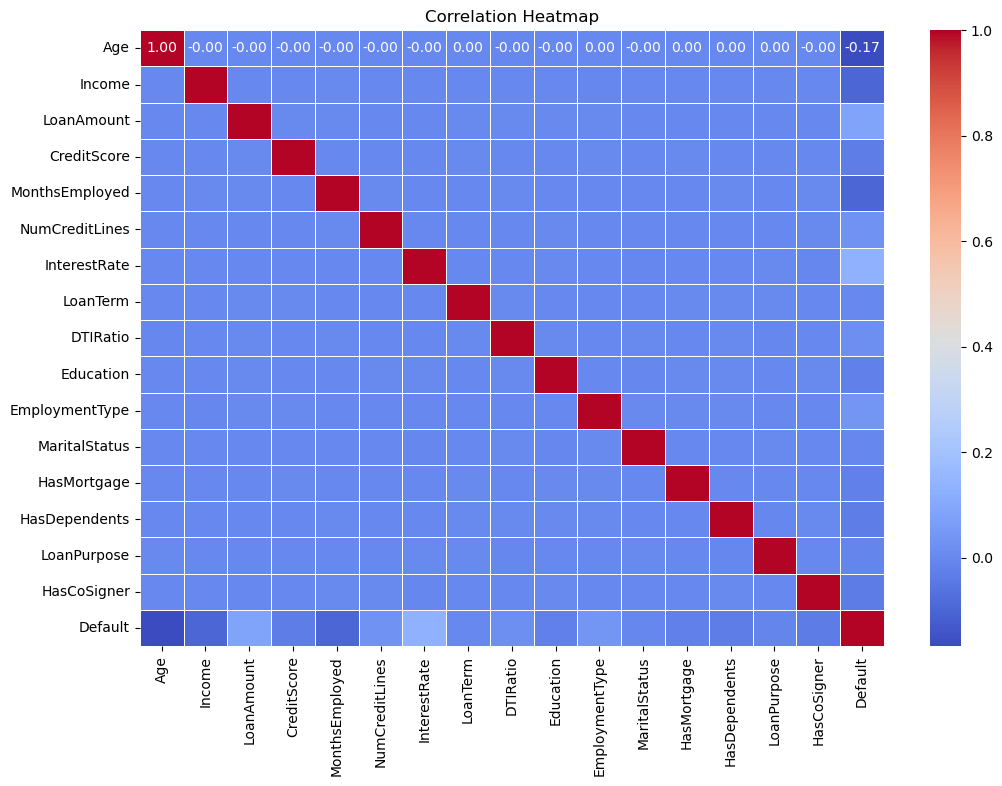

In [13]:
#  Compute correlation matrix
corr_matrix = data.corr()

#  Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Correlation Matrix

This heatmap shows the Pearson correlation between features and with the target (`Default`).  
Highly correlated features can lead to multicollinearity in some models, while features weakly correlated with the target may be less informative.
| Feature          | Correlation with Default | Interpretation                                                                                  |
| ---------------- | ------------------------ | ----------------------------------------------------------------------------------------------- |
| `InterestRate`   | +0.131                   | Borrowers with higher interest rates are **slightly more likely** to default.                   |
| `LoanAmount`     | +0.087                   | Larger loans are **weakly associated** with default.                                            |
| `EmploymentType` | +0.041                   | A weak positive association, possibly due to encoding of 'Unemployed'.                          |
| `NumCreditLines` | +0.028                   | Slight positive correlation; more credit lines may indicate financial overextension.           |
| `DTIRatio`       | +0.019                   | Higher debt-to-income ratio shows **minimal** correlation with default.                         |
| `LoanTerm`       | +0.001                   | Almost no relationship with default.                                                            |
| `MaritalStatus`  | -0.008                   | Very weak negative correlation.                                                                 |
| `LoanPurpose`    | -0.010                   | No meaningful relationship.                                                                     |
| `Education`      | -0.023                   | Higher education may **slightly reduce** default risk.                                          |
| `HasMortgage`    | -0.023                   | Minor negative association with default.                                                        |
| `CreditScore`    | -0.034                   | Slightly lower credit scores correlate with higher default risk.                                |
| `HasDependents`  | -0.035                   | Weak negative relationship.                                                                     |
| `HasCoSigner`    | -0.039                   | Slightly lowers default risk, possibly due to shared responsibility.                            |
| `MonthsEmployed` | -0.097                   | Longer employment duration **reduces** risk of default.                                         |
| `Income`         | -0.099                   | Higher income is **moderately protective** against default.                                     |
| `Age`            | -0.168                   | Older individuals are **less lik(y** to default ; the strongest negative corr)elation observed. |


In [14]:
#  Default rate across categories
categorical_cols = ['HasCoSigner', 'LoanPurpose', 'HasDependents', 'HasMortgage', 
                    'MaritalStatus', 'EmploymentType', 'Education']

for col in categorical_cols:
    rate = data.groupby(col)['Default'].mean()
    print(f"\nDefault rate by {col}:\n{rate}")


Default rate by HasCoSigner:
HasCoSigner
0    0.128661
1    0.103601
Name: Default, dtype: float64

Default rate by LoanPurpose:
LoanPurpose
0    0.118814
1    0.123260
2    0.118381
3    0.102348
4    0.117885
Name: Default, dtype: float64

Default rate by HasDependents:
HasDependents
0    0.127244
1    0.105024
Name: Default, dtype: float64

Default rate by HasMortgage:
HasMortgage
0    0.123451
1    0.108806
Name: Default, dtype: float64

Default rate by MaritalStatus:
MaritalStatus
0    0.125328
1    0.103972
2    0.119124
Name: Default, dtype: float64

Default rate by EmploymentType:
EmploymentType
0    0.094634
1    0.119652
2    0.114620
3    0.135529
Name: Default, dtype: float64

Default rate by Education:
Education
0    0.121011
1    0.128789
2    0.108717
3    0.105860
Name: Default, dtype: float64


s or want to export this summary as a table for your GitHub documentation.


# **MODEL BUILDING**

In [15]:
X = data.drop(['Default'], axis = 1)
y = data['Default']

We compute the mean of the `Default` variable for each category of the categorical features.  
This helps us identify **riskier groups** and features that may be useful predictors in our model.

####  Results and Interpretation

**🔹 HasCoSigner**
- `0` (No co-signer): **12.87%**
- `1` (Has co-signer): **10.36%**
>   Borrowers with co-signers have a slightly lower default rate probably due to added accountability.

---

**🔹 LoanPurpose**
- Categories (encoded 0–4): default rates range from **10.2%** to **12.3%**
> Minimal variation; suggests loan purpose alone doesn’t strongly influence default risk.

---

**🔹 HasDependents**
- `0` (No dependents): **12.72%**
- `1` (Has dependents): **10.5%**
>  Borrowers with dependents default slightly less maybe due to more financial planning.

---

**🔹 HasMortgage**
- `0` (No mortgage): **12.35%**
- `1` (Has mortgage): **10.88%**
>  Those with mortgages default slightly less, possibly indicating stronger financial discipline.

---

**🔹 MaritalStatus**
- Encoded as:  
  `0` = Divorced → **12.53%**  
  `1` = Married → **10.40%**  
  `2` = Single → **11.91%**
>  Married borrowers tend to default less than divorced or single ones maybe its stability factor.

---

**🔹 EmploymentType**
- Encoded as:  
  `0` = Full-time → **9.46%**  
  `1` = Part-time → **11.96%**  
  `2` = Self-employed → **11.46%**  
  `3` = Unemployed → **13.55%**
>  As expected, unemployed borrowers have the **highest default rate**, while full-time workers have the lowest.

---

**🔹 Education**
- Encoded as:  
  `0` = Associate → **12.10%**  
  `1` = Bachelor's → **12.88%**  
  `2` = High School → **10.87%**  
  `3` = Master's → **10.58%**
>  Higher education (Master’s, High School) seems slightly protective. Surprisingly, Bachelor’s degree holders have the **highest** default rate here.

---
###  Conclusion
- Categorical features like `EmploymentType`, `HasCoSigner`, and `HasMortgage` show **noticeable default rate differences**, making them useful for prediction.
- Features like `LoanPurpose` and `MaritalStatus` show **modest variation** and may require interaction terms.

**IMPORTING MACHINE LEARNING LIBRARIES, TRAIN TEST SPLIT, AND PERFOMANCE METRICS**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [17]:
#Splitig the data into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
#Models to be trained
models = [
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=0),  # silent CatBoost output
    RandomForestClassifier(),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(criterion='entropy'),
    KNeighborsClassifier(),
    GaussianNB()
]

In [19]:
#Training the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score =  accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall =  recall_score(y_test, y_pred)
    F1score = f1_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.3f}, Precision: {precision:.2f}, Recall: {recall:.2f}, f1score: {F1score:.2f}')

GradientBoostingClassifier - Accuracy: 0.886, Precision: 0.63, Recall: 0.05, f1score: 0.09
XGBClassifier - Accuracy: 0.885, Precision: 0.53, Recall: 0.08, f1score: 0.14
[LightGBM] [Info] Number of positive: 23722, number of negative: 180555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 204277, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116127 -> initscore=-2.029633
[LightGBM] [Info] Start training from score -2.029633
LGBMClassifier - Accuracy: 0.887, Precision: 0.60, Recall: 0.07, f1score: 0.12
CatBoostClassifier - Accuracy: 0.886, Precision: 0.57, Recall: 0.07, f1score: 0.13
RandomForestClassifier - Accuracy: 0.886, Precision: 0.61, Recall: 0.05, f1score: 0.09
LogisticRegression - Accuracy: 0.885, Precision: 0.58, Recall: 0.02, f1score: 0.04
Dec

- Most models show **high accuracy (88%)** but **very low recall (0.01–0.09)** for the default class.
- **Tree** based models performed better than the other ones
- **F1-scores are very low**, indicating poor predictive performance for the minority class (defaults).
- **Class imbalance** is severely affecting the models since they tend to predict the majority class (non-default) most of the time.


This suggests that the models are not effectively identifying defaulting clients, **which defeats the purpose of the prediction.**

To improve model performance on the minority class, I will:

- Use **SMOTE (Synthetic Minority Oversampling Technique)** to curb class imbalance problems
- Use **Class weights** (`class_weight='balanced'` for some models)

In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Retrain on resampled data
model_resampled = [GradientBoostingClassifier(), 
                   LogisticRegression(class_weight='balanced', max_iter=1000),
                   CatBoostClassifier(verbose=0), XGBClassifier()]
for model in model_resampled:
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__,'\n', classification_report(y_test, y_pred))

GradientBoostingClassifier 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     45139
           1       0.28      0.23      0.26      5931

    accuracy                           0.84     51070
   macro avg       0.59      0.58      0.58     51070
weighted avg       0.83      0.84      0.83     51070

LogisticRegression 
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.21      0.66      0.32      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.67      0.56     51070
weighted avg       0.85      0.68      0.73     51070

CatBoostClassifier 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.53      0.09      0.16      5931

    accuracy                           0.88     51070
   macro avg       0.71      0.54      0.55     51070
wei

**SMOTE Results**

After applying **SMOTE**, we observe an increase in f1score

While overall accuracy remains high for all models remains high, we now detect more actual defaulters (class 1), unlike before where the model predicted almost none.

**However**, recall and F1-score are still low, which means:
- The model struggles to identify many defaulters.
- We still have class imbalance or insufficient separability in features.

**Why F1-Score Matters More Than Accuracy Here**

_Accuracy_ measures overall correctness but doesn't tell us how well the model is doing on each class, especially the minority.
Although the accuracy was high, this was misleading. The models almost always predicted 'no default', hence failing to identify true defaults.

_F1-score_ is the harmonic mean of precision and recall, making it a better metric when:

- Classes are imbalanced

- Both false positives and false negatives are costly

In loan default prediction:

A false negative (predicting no default when the person defaults) is more dangerous than a false positive.
The F1-score reflects the balance between identifying defaults (recall) and ensuring those identified are true defaulters (precision).

Therefore, improvements in the F1-score indicate that the model has become better at identifying true defaults without too many false alarms, which is important for financial risk modeling.

by Songiso Adrian 